
# Lab 2. Quantum Algorithms

<div class="alert alert-block alert-success">

This Lab includes 
**Quantum Fourier Tranform (QFT)**, 
**Quantum Phase Estimation (QPE)**, 
**Rivest-Shamir-Adleman (RSA) Algorithm in Cryptography**, and
**Shor's Factoring Algoritm**.
- This Lab notebook contains several theoretical discussions as well in case if you need them as references. They are optional rather than mandatory to read. If you find it difficult to write an answer for an exercise, try to read the above theoretical discussions.

- Notice that qiskit has a reversed convention when writing the code: $|x_0...x_{n-1}\rangle_{\rm normal~convention}=|q_{n-1}...q_{0}\rangle_{\rm qiskit~convention}$ or one should exchange index as $i\leftrightarrow n-1-i$ when comparing qiksit code to theoretical formula.

- Use `Shift`+`Enter` to execute code cell

</div >

First, **Execute the following cell** to import relevant Python packages in the Lab.

In [1]:
# Data Analysis Packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# IBM Qiskit Packages
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import transpile, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## 1. Quantum Fourier Transform

The **Discrete Fourier transform (DFT)**
$$
x\to y: y_k=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\omega_N^{jk}x_j,~~~{\rm with ~\omega_N^{jk}=e^{2\pi i\frac{jk}{N}}}
$$
maps a vector $(x_0,...,x_{N-1})$ to vector $(y_0,...,y_{N-1})$. 

Its quantum analogy is the **Quantum Fourier transform (QFT)**
that transforms a quantum state 
$$|X\rangle=\sum_{j=0}^{N-1}x_j|j\rangle\to |Y\rangle=\sum_{k=0}^{N=1}y_k|k\rangle$$
The basis quantum states transform as
$$
|j\rangle\to\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk}|k\rangle,~~~{\rm with~\omega_N^{jk}=e^{2\pi i\frac{jk}{N}}}
$$
which maps a set of quantum states to another set of quantum states.

The QFT can be represented as a unitary matrix acting on quantum states
$$
U_{QFT}=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}\omega_{N}^{jk}|k\rangle\langle j |
$$

### 1.1 Single qubit QFT
Now consider a single qubit QFT, transforming quantum state $|X\rangle=\alpha|0\rangle+\beta|1\rangle\to U_{QFT}|X\rangle=\alpha'|0\rangle+\beta'|1\rangle$. 
Now we can calculate
$$
y_0=\frac{1}{\sqrt{2}}\bigg[\alpha\exp\bigg(2\pi i\frac{0\times 0}{2}\bigg)+\beta\exp\bigg(2\pi i\frac{1\times 0}{2}\bigg)\bigg]=\frac{1}{\sqrt{2}}(\alpha+\beta)\\
y_1=\frac{1}{\sqrt{2}}\bigg[\alpha\exp\bigg(2\pi i\frac{0\times 1}{2}\bigg)+\beta\exp\bigg(2\pi i\frac{1\times 1}{2}\bigg)\bigg]=\frac{1}{\sqrt{2}}(\alpha-\beta)
$$

This QFT has the form $U_{QFT}|X\rangle=\frac{1}{\sqrt{2}}(\alpha+\beta)|0\rangle+\frac{1}{\sqrt{2}}(\alpha-\beta)|1\rangle$ and it is simply a **Hadamard gate**
$$
U_{QFT}=H=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1& -1\\
\end{pmatrix}
$$

<div class="alert alert-block alert-success">
    
**Exercise 1. Single qubit QFT**
    
What is the QFT of Z-basis states $|0\rangle$ and $|1\rangle$?
</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
They become X-basis states
$$
U_{QFT}|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|+\rangle\\
U_{QFT}|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=|-\rangle
$$


### 1.2 Fractional binary notation
An integer number $y$ with $n$-bits has $N=2^n$ possibilities, and we can present it in binary notation $y=y_{0}...y_{n-1}$ called **binary string** or **bitstring**, where $y_{i}=0,1$. It's easy to find a relation between the number and its binary values in the bitstring
$$
\frac{y}{2^n}=\sum_{k=0}^{n}\frac{y_{k}}{2^{k+1}}
$$
For example, the integer $22=2^4+2^2+2^1$ has binary form $(10110)_2$. That is $y_0=1$, $y_1=0$, $y_2=1$, $y_3=1$, $y_4=0$. We can check that
$$
\frac{22}{2^4}
=\frac{1\times 2^4+0\times 2^3+1\times 2^2+0\times 2^1+1\times 2^1}{2^4}
=\frac{1}{2^1}+\frac{0}{2^2}+\frac{1}{2^3}+\frac{1}{2^4}+\frac{0}{2^5}
$$
In Python, the bitstring of an integer can be calculated with function `bin()`, for example
```python
>>>bin(22)
'0b10110'
```
and we can truncate the string to drop be binary symbol `0b`
```python
>>>bin(22)[2:]
'10110'
```
We can also calculate the integer back using `int()`, for example
```python
>>>int(0b10110)
22
```

<div class="alert alert-block alert-success">
    
**Exercise 2. Understanding binary string**
    
What is the bitstring of integer `20231019`? What is the integer corresponding to bistring `11110001001000000`? Calculate them using `bin()` function and `int()` function.

</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>

```python
>>>bin(20231019)[2:]
'1001101001011001101101011'

>>>int(0b11110001001000000)
123456
```
    
</div>

### 1.3 Multi-qubit QFT
In transform of basis states 
$$
|x\rangle\to\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy}|y\rangle,~~~{\rm with~\omega_N^{xy}=e^{2\pi i\frac{xy}{N}}}
$$
we qubitize the basis quantum state $|y\rangle$ the same as the bitstring of the integer number $y$. For example, if $y=22$, then we have $|y\rangle=|10110\rangle$.

With binary string techniques, we can write down the general QFT form for multi-qubit case
\begin{align}
U_{QFT}|x\rangle
&=\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}e^{2\pi i xy/2^n}|y\rangle\\
&=\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}e^{2\pi i x(\sum_{k=0}^{n-1} y_k/2^{k+1})}|y_{0}...y_{n-1}\rangle\\
&=\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\prod_{k=0}^{n-1}e^{2\pi i xy_k/2^{k+1}}|y_{0}...y_{n-1}\rangle\\
&=\frac{1}{\sqrt{N}}\prod_{k=0}^{n-1}\sum_{y_1=0}^{1}...\sum_{y_n=0}^{1}e^{2\pi i xy_k/2^{k+1}}|y_{0}...y_{n-1}\rangle\\
&=\frac{1}{\sqrt{N}}\bigotimes_{k=0}^{n-1}\bigg(|0\rangle+e^{\frac{2\pi i}{2^{k+1}} x}|1\rangle\bigg)\\
&=\frac{1}{\sqrt{N}}\bigg(|0\rangle+e^{\frac{2\pi i}{2^1} x}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^2} x}|1\rangle\bigg)\otimes...\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^{n-1}} x}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^n} x}|1\rangle\bigg)\\
\end{align}
This is the theoretical basics for implementing multi-qubit QFT.

\begin{align}
U_{QFT^{-1}}|x\rangle
&=\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}e^{-2\pi i xy/2^n}|y\rangle,~~~{\rm with}~N=2^n
\end{align}

<div class="alert alert-block alert-success">
    
**Exercise 3. Multi-qubit QFT**
    
What is the QFT of $3$-qubit state $|x\rangle=|101\rangle$?

</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>


First we know that $N=2^3=8$ and we calculate $x$=`int(0b101)`=5. Then
\begin{align}
U_{QFT}|101\rangle
=\frac{1}{\sqrt{8}}\bigg(|0\rangle+e^{\frac{2\pi i}{2} 5}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{4}5}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{8}5}|1\rangle\bigg)
\end{align}
    
The qubits are rotated by $\frac{5}{2}$, $\frac{5}{4}$ and $\frac{5}{8}$ respectively

    
</div>

### 1.4 Implementing the QFT
As we see from **1.1**, the single-qubit QFT is simply a Hadamard gate. It is useful as well in a multi-qubit QFT.
Remember the Euler's formula $e^{ix}=\cos(x)+i\sin(x)$ and notice that a **Hadamard gate** $H$ gives
\begin{align}
H|0\rangle&=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=\frac{1}{\sqrt{2}}(|0\rangle+e^{\frac{2\pi i}{2}0}|1\rangle)\\
H|1\rangle&=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=\frac{1}{\sqrt{2}}(|0\rangle+e^{\frac{2\pi i}{2}1}|1\rangle)
\end{align}
Thus for any bit $x_k=0,1$ in a bitstring $x$, we have
$$
H|x_k\rangle=\frac{1}{\sqrt{2}}(|0\rangle+e^{\frac{2\pi i}{2}x_k}|1\rangle)
$$
Another gate we need is the **two-qubit controlled rotation ($CROT_{k}$)** with controlled qubit on the upper side. It can be implemented as a special case of **two-qubit controlled phase gate ($CP(2\pi/2^k)$)**

$$
CROT_k=CP(2\pi/2^k)
=\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{\frac{2\pi i}{2^{k}}} \\
\end{pmatrix}
$$

**Now implement the QFT step by step (skip this theoretical discussion if you already understand it):**

(1) Implement $H$ on qubit $x_0$
$$
H_1|x_{0}...x_{n-1}\rangle=\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_{0}}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
$$
(2) Implement $CROT$ from qubit $x_1$ to qubit $x_0$
$$
CROT_{2}\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_0}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
=\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_0+\frac{2\pi i}{2^2}x_1}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
$$
(3) Implement $CROT$ again from qubit $x_2$ to qubit $x_0$
$$
CROT_{3}\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_0+\frac{2\pi i}{2^2}x_1}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
=\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_0+\frac{2\pi i}{2^2}x_1+\frac{2\pi i}{2^3}x_2}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
$$


(4) Repeat the process from all $x_3...x_{n-1}$ to $x_0$ and remember that $\frac{x}{2^n}=\sum_{k=0}^{n-1}\frac{x_k}{2^{k+1}}$ or $x=2^{n-1}x_{0}+...x^{1}x_{n-2}+2^{0}x_{n-1}$, one get
$$
\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_{0}+\frac{2\pi i}{2^2}x_{1}+...+\frac{2\pi i}{2^n}x_{n-1}}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
=\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2^{n}}x}|1\rangle\bigg]\otimes|x_{1}...x_{n-1}\rangle
$$
Above implementation of phase $\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_{0}+\frac{2\pi i}{2^2}x_{1}+...+\frac{2\pi i}{2^n}x_{n-1}}|1\rangle\bigg]$
is for qubit $x_0$ from bitstring $x_{0}...x_{n-1}$.


(5) Next we repeat the above whole process to implement the phase for $x_1$ from bitstring $x_{1}...x_{n-1}$

$$\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2}x_{1}+\frac{2\pi i}{2^2}x_{2}+...+\frac{2\pi i}{2^{n-1}}x_{n-1}}|1\rangle\bigg]
=\frac{1}{\sqrt{2}}\bigg[|0\rangle+e^{\frac{2\pi i}{2^{n-1}}x}|1\rangle\bigg]
$$
where we used the fact that the phase $2\pi i x_{0}$ contributes nothing no matter $x_0=0$ or $x_0=1$, and we can add this phase for free.


(6) Repeat the process for all the bits one has the QFT but **with revsered order**
$$
\frac{1}{\sqrt{N}}\bigg(|0\rangle+e^{\frac{2\pi i}{2^n} x}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^{n-1}} x}|1\rangle\bigg)\otimes...\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^{2}} x}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{\frac{2\pi i}{2^1} x}|1\rangle\bigg)
$$
Notice that order is revsersed with this implementation so that we should swap qubits as a final step

**In summary, the QFT pseudo-code is**
```python
for j in range(0,n):
    Apply H on x_{j}
    for k in range(j,n+1):
        Apply CROT_{k-j+1} from x_{k} to x_{j}
for j in range(0,n//2):
    Swap x_{j} and x_{n-j-1}
```

<div class="alert alert-block alert-success">
    
**Exercise 4. Implementing multi-qubit QFT**    
    
Complete the code below for $3$-qubit QFT (Notice that qiskit has a reversed convention $|x_0...x_{n-1}\rangle_{\rm normal~convention}=|q_{n-1}...q_{0}\rangle_{\rm qiskit~convention}$ or one should exchange index as $i\leftrightarrow n-1-i$)
    
</div>

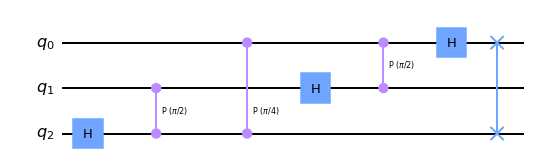

In [2]:
qc=QuantumCircuit(3)
qc.h(2)
qc.cp(2*np.pi/4,1,2)
qc.cp(2*np.pi/8,0,2)
qc.h(1)

###############################################
### WRITE YOUR CODE BETWEEN THESE LINES - START

qc.cp(2*np.pi/4,0,1)

### WRITE YOUR CODE BETWEEN THESE LINES - END
###############################################

qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>

```python
qc.cp(2*np.pi/4,0,1)
```
    
    
</div>

<div class="alert alert-block alert-success">

    
**Exercise 5. Implementing scalable multi-qubit QFT**    
    
Complete the code below for general multi-qubit QFT (Notice that qiskit has a reversed convention $|x_0...x_{n-1}\rangle_{\rm normal~convention}=|q_{n-1}...q_{0}\rangle_{\rm qiskit~convention}$ or one should exchange index as $i\leftrightarrow n-1-i$)
    
<div>

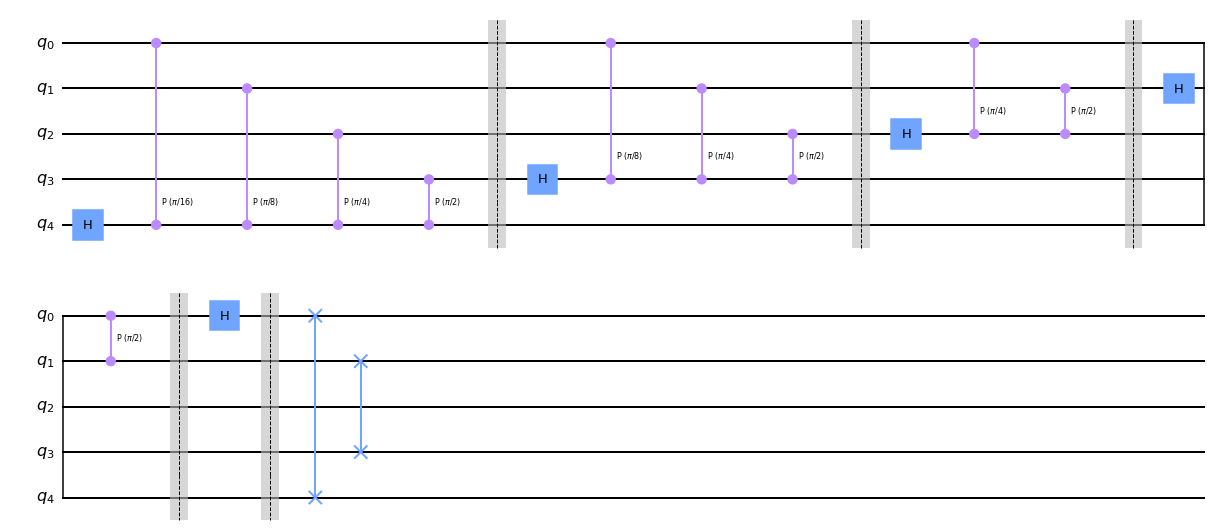

In [3]:
def qft(qc,n):
    
    for j in range(n-1,-1,-1):
        qc.h(j)
        for k in range(0,j):
            
            ###############################################
            ### WRITE YOUR CODE BETWEEN THESE LINES - START
            
            qc.cp(np.pi/2**(j-k),k,j)
            
            ### WRITE YOUR CODE BETWEEN THESE LINES - END
            ###############################################
        
        qc.barrier()
        
    for j in range(0,n//2):
        qc.swap(j,n-j-1)
    return qc


# See for example a 5-qubit QFT
qc=QuantumCircuit(5)
qc=qft(qc,5)
qc.draw('mpl')

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>

```python
qc.cp(np.pi/2**(j-k),k,j)
```

</div>

One may also implemnt it in a recrusive method. **Execute the following cell** to proceed.

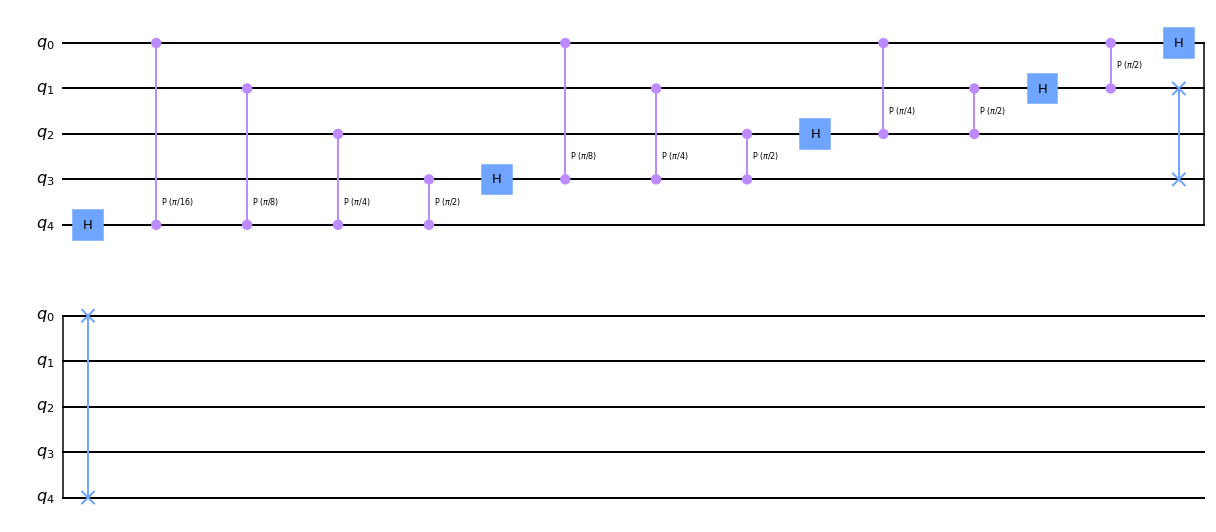

In [4]:
def qft_rotation(qc,n):
    if n==0:
        return qc
    n-=1
    qc.h(n)
    for qubit in range(0,n):

        qc.cp(np.pi/2**(n-qubit),qubit,n)
            
    qft_rotation(qc,n)
    
def swap_registers(qc,n):
    for qubit in range(0,n//2):
        qc.swap(qubit,n-qubit-1)
    return qc


def qft_recursive(qc,n):
    qft_rotation(qc,n)
    swap_registers(qc,n)
    return qc


# See for example a 5-qubit QFT
qc=QuantumCircuit(5)
qc=qft_recursive(qc,5)
qc.draw('mpl')

Revisit the question in **1.3**, we can check the QFT of state $|101\rangle$ using the qiskit. **Execute the following cell** to proceed.

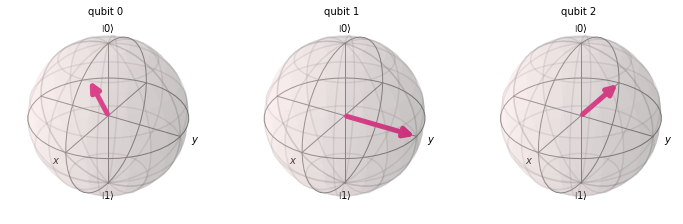

In [5]:
# Create the Quantum Circuit
qc = QuantumCircuit(3)

# Initialize the state |101>
qc.x(0)
qc.x(2)

# Apply the QFT
qc=qft(qc,3)

# Save state vector 
sim = Aer.get_backend("aer_simulator")
qc_qft = qc.copy()
qc_qft.save_statevector()
statevector = sim.run(qc_qft).result().get_statevector()
plot_bloch_multivector(statevector)


The qubits are rotated by $\frac{5}{8}$, $\frac{5}{4}$ and $\frac{5}{2}$ respectively (Notice the difference convention of qiskit and normal cases. For example, here $q_2$ is $x_0$).

## 2. Quantum Phase Estimation

Given a unitary operator, **Quantum phase estimation (QPE)** algorithm estimates the angle $\theta$ in $U|\psi\rangle=e^{2\pi i\theta}|\psi\rangle$ with **quantum kickback** effect

### 2.1 Quantum kickback
Consider the $CNOT$-gate on quantum state $|\rm control, target \rangle$, notice that $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$, there are several cases:

For state $|0+\rangle$, it becomes entangled
$$
CNOT|+0\rangle=CNOT\frac{1}{\sqrt{2}}(|00\rangle+|10\rangle)=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

For state $|++\rangle$, it is unchanged
$$
CNOT|++\rangle=CNOT\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)=\frac{1}{2}(|00\rangle+|11\rangle+|10\rangle+|01\rangle)=|++\rangle
$$

For state $|+-\rangle$, it instead changes the control qubit, known as **quantum kickback**
$$
CNOT|+-\rangle=CNOT\frac{1}{2}(|00\rangle-|01\rangle+|10\rangle-|11\rangle)=\frac{1}{2}(|00\rangle-|01\rangle+|11\rangle-|01\rangle)=|--\rangle
$$

<div class="alert alert-block alert-success">
    
**Exercise 6. Testing quantum kickback**    
    
What is the result for $CNOT|-+\rangle$ and for $CNOT|--\rangle$ ? Are they unchanged or kickbacked? 
    
</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
$$
CNOT|-+\rangle=CNOT\frac{1}{2}(|00\rangle+|01\rangle-|10\rangle-|11\rangle)=\frac{1}{2}(|00\rangle+|01\rangle-|11\rangle-|10\rangle)=|-+\rangle
$$
    
$$
CNOT|--\rangle=CNOT\frac{1}{2}(|00\rangle-|01\rangle-|10\rangle+|11\rangle)=\frac{1}{2}(|00\rangle-|01\rangle-|11\rangle+|10\rangle)=|+-\rangle
$$

</div>

Similar to the controlled rotation gate $CROT$ in implementing QFT, we may consider controlled-phase gate $CP$ as a more general case. They applies to the target bit iff its control bit is $|1\rangle$
$$
CP(\phi)=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\phi}
\end{pmatrix}
$$

### 2.2 Implementing the QPE

(1) Consider quantum state by product of a set of $|+\rangle$ states with an arbitrary state $|\psi\rangle$, which can be initialized with multiple Hadamard gates
$$
|\phi\rangle=|x_{0}...x_{n-1}\rangle\otimes|\psi\rangle=|+...+\rangle\otimes|\psi\rangle=\frac{1}{\sqrt{2^n}}(|0\rangle+|1\rangle)^{\otimes n}|\psi\rangle
$$

Consider the controlled-Phase gate $CP$ with factor $2\pi$ on phase $\theta$
$$
CP(2\pi\theta)=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{2\pi i\theta}
\end{pmatrix},
~~~{\rm and~}
CP(2\pi\theta m)=CP^m(2\pi\theta)
$$
(2) Next we apply the $CP$ gate from bitstring $x_1...x_n$ sequentially to the state $|\psi\rangle$.
\begin{align}
CP^{2^{n-1}}(2\pi\theta)|x_{0}\psi\rangle&=CP(2^{n-1}2\pi\theta)|x_{0}\psi\rangle: 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes|\psi\rangle \to 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes e^{2\pi i\theta 2^{n-1}}|\psi\rangle
=(|0\rangle+e^{2\pi i\theta 2^{n-1}}|1\rangle)\otimes |\psi\rangle\\
CP^{2^{n-2}}(2\pi\theta)|x_{1}\psi\rangle&=CP(2^{n-2}2\pi\theta)|x_{1}\psi\rangle: 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes|\psi\rangle \to 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes e^{2\pi i\theta 2^{n-2}}|\psi\rangle
=(|0\rangle+e^{2\pi i\theta 2^{n-2}}|1\rangle)\otimes |\psi\rangle\\
&...\\
CP^{2^{1}}(2\pi\theta)|x_{n-2}\psi\rangle&=CP(2^{1}2\pi\theta)|x_{n-2}\psi\rangle: 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes|\psi\rangle \to 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes e^{2\pi i\theta 2^1}|\psi\rangle
=(|0\rangle+e^{2\pi i\theta 2^1}|1\rangle)\otimes |\psi\rangle\\
CP^{2^{0}}(2\pi\theta)|x_{n-1}\psi\rangle&=CP(2^{0}2\pi\theta)|x_{n-1}\psi\rangle: 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes|\psi\rangle \to 
|0\rangle\otimes|\psi\rangle+|1\rangle\otimes e^{2\pi i\theta 2^0}|\psi\rangle
=(|0\rangle+e^{2\pi i\theta 2^0}|1\rangle)\otimes |\psi\rangle\\
\end{align}

(3) Apply the above circuits to the qunatum state $|\phi\rangle$, and notice that $x=2^{n-1}x_1+...+2^0x_n$ we have
\begin{align}
|\phi\rangle&\to
\frac{1}{\sqrt{2^n}}\bigg(|0\rangle+e^{2\pi i\theta 2^{n-1}}|1\rangle\bigg)\otimes ...\otimes\bigg(|0\rangle+e^{2\pi i\theta 2^{1}}|1\rangle\bigg)\otimes\bigg(|0\rangle+e^{2\pi i\theta 2^{0}}|1\rangle\bigg)|\psi\rangle\\
&=\frac{1}{\sqrt{2^n}}\bigg(\sum_{x_0=0}^{1}e^{2\pi i\theta 2^{n-1}x_0}|x_0\rangle\bigg)\otimes ...\otimes\bigg(\sum_{x_{n-2}=0}^{1}e^{2\pi i\theta 2^{1}x_{n-2}}|x_{n-2}\rangle\bigg)\otimes\bigg(\sum_{x_{n-1}=0}^{1}e^{2\pi i\theta 2^{0}x_{n-1}}|x_{n-1}\rangle\bigg)|\psi\rangle\\
&=\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}e^{2\pi i\theta x}|x\rangle|\psi\rangle\\
&=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}e^{2\pi i\theta x}|x\rangle|\psi\rangle
\end{align}


(4) Now apply an inversed QFT $U_{QFT^{-1}}$ to the state $|x\rangle$, we have
$$
U_{QFT^{-1}}|x\rangle
=\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}e^{-2\pi i xy/2^n}|y\rangle\\
$$
and thus 
$$
U_{QFT^{-1}}|\phi\rangle=\frac{1}{N}\sum_{x=0}^{N-1}\sum_{y=0}^{N-1}e^{2\pi i x(\theta-\frac{y}{2^n})}|y\rangle|\psi\rangle
$$
That means the measurement will result in higher probability when $y=2^n\theta$, or when $2^n\theta$ is an integer.


Now exchange the sequence of $x$ and $y$
\begin{align}
|\phi\rangle=&\frac{1}{N}\sum_{x=0}^{N-1}\sum_{y=0}^{N-1}e^{2\pi i x(\theta-\frac{y}{2^n})}|y\rangle|\psi\rangle\\
=&\frac{1}{N}\sum_{y=0}^{N-1}\bigg(\sum_{x=0}^{N-1}e^{2\pi i x(\theta-\frac{y}{2^n})}\bigg)|y\rangle|\psi\rangle\\
=&\frac{1}{N}\sum_{y=0}^{N-1}\frac{1-e^{2\pi i(\theta-\frac{y}{2^n})2^n}}{1-e^{2\pi i(\theta-\frac{y}{2^n})}}|y\rangle|\psi\rangle
\end{align}

The probability of getting state $|y\rangle$ for measuring the controlling register is
$$
P(y)=\frac{1}{N^2}\bigg|\frac{1-e^{2\pi i(\theta-\frac{y}{2^n})2^n}}{1-e^{2\pi i(\theta-\frac{y}{2^n})}}\bigg|^2
=\frac{1}{N^2}\frac{1-\cos[2\pi (\theta-\frac{y}{2^n})2^n]}{1-\cos[2\pi(\theta-\frac{y}{2^n})]},~~~
{\rm with}~\sum_{y=0}^{N-1}P(y)=1
$$
It peaks when $\theta-\frac{y}{2^n}$ is an integer due to **qunatum interference** (See the figure in lecture slides). Restricting the phase $0<\theta<1$, we have $\theta\simeq \frac{y}{2^n}$.


**In summary**, if we have a phase gate $CP(2\pi\theta)$, we can repeatly perform it to construct a QPE circuit and estimate its phase $\theta$.

**The QPE pseudo-code is**
```python
for j in range(0,n):
    Apply H on x_{j}
    
for j in range(0,n):
    for k in range(0,2^{n-j-1}):
        Apply CP(2 pi theta) from x_{j} to psi

```
Measue the output and seek for peak value in probability, the $\theta\simeq\frac{y}{2^n}$ when the peak is in state $|y\rangle$

Now let's implement a QPE code. We first prepare the inverse QFT, and show with $3$-qubits. **Execute the following cell** to proceed.

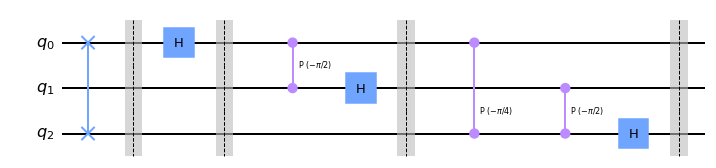

In [6]:
# Inverse QFT
def qft_inv(qc,n):
    for j in range(n//2):
        qc.swap(j,n-j-1)
    qc.barrier()
    for j in range(0,n):
        for k in range(0,j):
            qc.cp(-np.pi/2**(j-k),k,j)
        qc.h(j)
        qc.barrier()
        
    return qc

# See for example a 3-qubit inv QFT
qc=QuantumCircuit(3)
qc=qft_inv(qc,3)
qc.draw('mpl')

Check that a quantum circuit is invariant under QFT and inv QFT. **Execute the following cell** to proceed.
For example, initialize a $5$-qubit circuit with $|10110\rangle$. The measurement will return $|10110\rangle$ as well under $U_{QFT^{-1}}U_{QFT}$

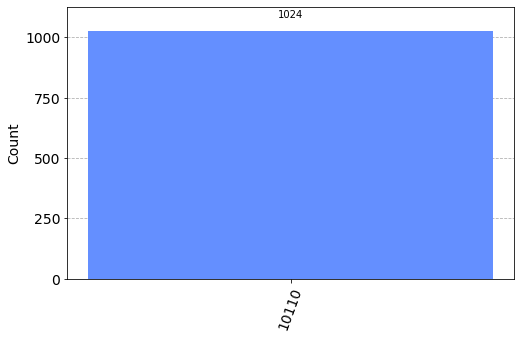

In [7]:
qc=QuantumCircuit(5)
qc.x(1)
qc.x(2)
qc.x(4)

qft(qc,5)
qft_inv(qc,5)
qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
shots=1024
result =simulator.run(qc,shots=shots).result()
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(8,5))

<div class="alert alert-block alert-success">
    
**Exercise 7. Implementing and testing the QPE**    
    
Complete the code below for QPE (Notice that qiskit has a reversed convention $|x_0...x_{n-1}\rangle_{\rm normal~convention}=|q_{n-1}...q_{0}\rangle_{\rm qiskit~convention}$ or one should exchange index as $i\leftrightarrow n-1-i$) and show with $3$ qubits
    
</div>

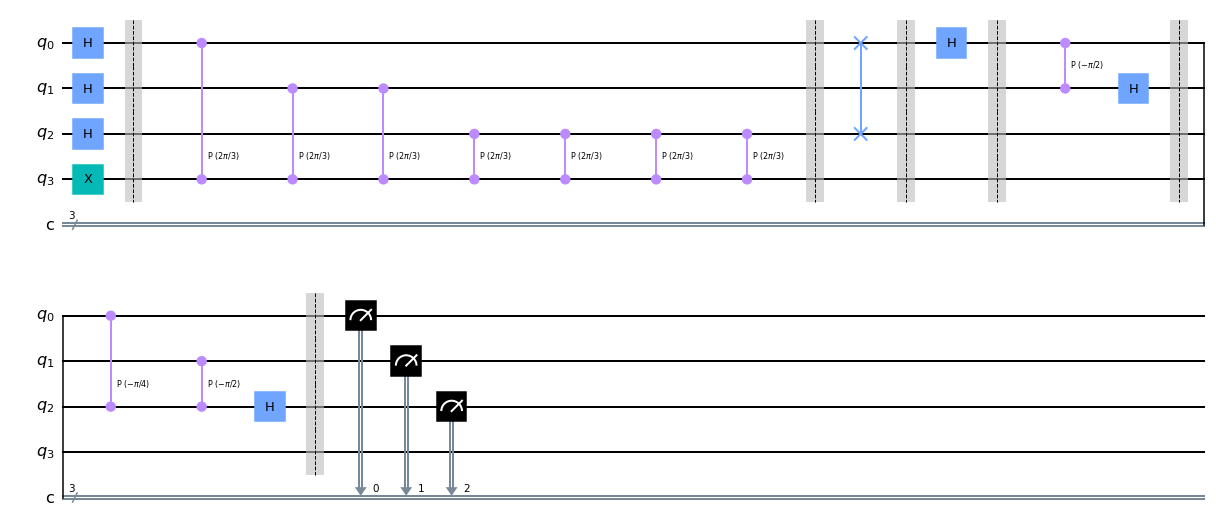

In [8]:
def cp_theta(qc,theta,x,psi):
    qc.cp(2*np.pi*theta,x,psi)
    return qc

def qpe(qc,n,theta):
    for j in range(0,n):
        qc.h(j)
    qc.barrier()
    for j in range(0,n):
        for k in range(0,2**j):
            
            ###############################################
            ### WRITE YOUR CODE BETWEEN THESE LINES - START
        
            qc=cp_theta(qc,theta,j,n)
            
            ### WRITE YOUR CODE BETWEEN THESE LINES - END
            ###############################################
        
    qc.barrier()
    qc=qft_inv(qc,n)
    
    
    for j in range(0,n):
        qc.measure(j,j)

    return qc
            
#######################
# See for example a 3+1-qubit QPE for phase theta=1/3
# Create circuit with 4 qubits and 3 classical bits to store the result
qc=QuantumCircuit(4,3)

# Initialize the |psi> state as |1>
qc.x(3)

# Apply QPE
qc=qpe(qc,3,1/3)
qc.draw('mpl')

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
```python
qc=cp_theta(qc,theta,j,n)
```
    
</div>

Now let's perform a QPE for phase $\theta=1/3$ with $3$ qubits. **Execute the following cell** to proceed.

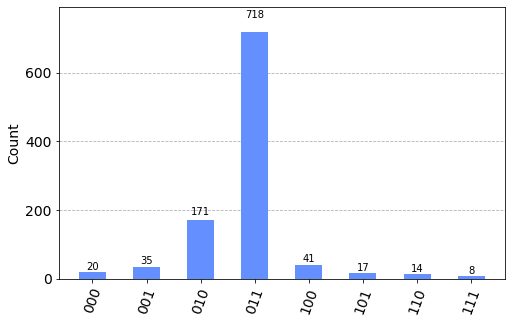

In [9]:
n_qubit=3
theta=1/3

qc=QuantumCircuit(n_qubit+1,n_qubit)
qc.x(n_qubit)
qc=qpe(qc,n_qubit,theta)
qc.draw('mpl')

simulator = Aer.get_backend('qasm_simulator')
shots=1024
result =simulator.run(qc,shots=shots).result()
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(8,5))

We see that the peak value is at $|011\rangle_{2}=|3\rangle_{10}$. With $3$-qubit QPE, we conclude that the phase $\theta\simeq y/2^n=3/8=0.375$ which is close to its exact value $\theta=1/3\approx 0.333$ but not quite close. the relative error is about $12.5\%$. This is because $3$-qubit is not precise enough, the precision is only $1/8$.

Now let's double the qubit number and try to perform a QPE for phase $\theta=1/3$ with $6$ qubits and we should have precision $1/64$. **Execute the following cell** to proceed.

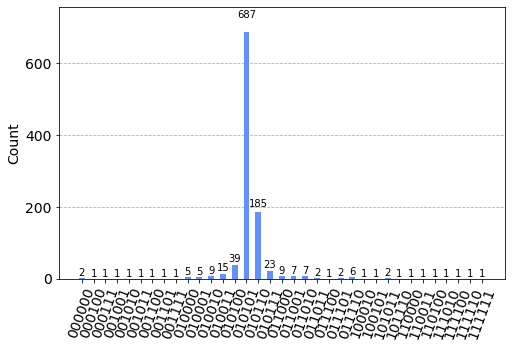

In [10]:
n_qubit=6
theta=1/3

qc=QuantumCircuit(n_qubit+1,n_qubit)
qc.x(n_qubit)
qc=qpe(qc,n_qubit,theta)
qc.draw('mpl')

simulator = Aer.get_backend('qasm_simulator')
shots=1024
result =simulator.run(qc,shots=shots).result()
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(8,5))

The peak value points to a state $|10101\rangle_{2}=|21\rangle_{10}$. We conclude that $\theta\simeq y/2^n=21/64\approx 0.328$, this is quite close to the exact answer $\theta=1/3\approx 0.333$. The relative error is down to only $1.56\%$.

## 3. Shor's Factoring Algorithm

### 3.1 Rivest-Shamir-Adleman (RSA) cryptosystem (Optional Reading)

A commenly used encryption algorithm is the **Rivest-Shamir-Adleman (RSA) algorithm**. 

#### 3.1.1 Encryption and decryption

Suppose we have **plaintext $P$** digitized as an integer number (will of course be stored in computer with bitstrings), we can encrypt it as a **ciphertext $C$** with 
$$
C=P^E(mod N)
$$
where the integer-number encryption power $E$ and integer number $N$ together is called the **public key (E,N)**.
Inversely, if we have the ciphertext $C$, we can decrypt it to get the plaintext $E$ with
$$
P=C^D(mod N)
$$
where the integer-number decryption power $D$ and integer number $N$ together is called the **private key (D,N)**.

That means if we have the public key, we can always encrypt a plaintext and if we have the private key, we can always decrypt the ciphertext.


#### 3.1.2 Choose proper values in the RSA cryptography
How do we choose the integer numbers $E$, $D$ and $N$? The RSA algorithm requires firstly choosing two prime numbers $p$ and $q$. Then we calculate the large number $N$ and its **Euler totient** 
$$L=lcm(p-1,q-1)$$
with `lcm` the **least common multiple**. 

Then, we can choose $1<E<L$ and $1<D<L$ such that 
$$
gcd(E,L)=1\\
ED (mod L)=1
$$
with `gcd` the **greatest common factor**.

**For example**: Choose $p=17$ and $q=19$. We calculate $N=pq=323$ and $L=lcm(p-1,q-1)=lcm(16,18)=144$. 
We may choose $E=5$ such that $gcd(E,L)=gcd(5,144)=1$, and then choose $D=29$ such that $ED (mod L)=5\times 29 (mod 144)=1$. Now we get the public key $(E,N)=(5,323)$ and private key $(D,N)=(29,323)$.

Suppose we encrypt the plaintext $P=123$ to get the secret message
$$
C=P^E (mod N)=123^{5} (mod 323)=225
$$
We can decrypt this ciphertext to reveal the plain message as
$$
P=C^D (mod N)=225^{29}=123
$$

<div class="alert alert-block alert-success">
    
**Exercise 8. Testing Encryption And Decryption in RSA Cryptography**    

Check the encryption and decryption with Python ($P<N$ and $C<N$). Execute the following cell with different $P$ to proceed
    

</div>

In [ ]:
P=
####
E=5
D=29
N=323
C=P**E%N
print('Ciphertext:',C)
print('Plaintext:',C**D%N)

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>

For example
```python
>>>P=123
>>>E=5
>>>D=29
>>>N=323
>>>C=P**E%N
>>>print('Ciphertext:',C)
>>>print('Plaintext:',C**D%N)


Ciphertext: 225
Plaintext: 123
```

</div>

### 3.2 Period finding method for hacking the RSA cryptosystem

Now we want to hack a message $P$, we know the public key $(E,N)$ but we need the private key $(D,N)$ to decrypt it. How do we do it? We need to get the decryption power $D$. In order to get that, we need the Euler toitient $L$. In order to get that, we need the prime numbers $p$ and $q$ such that $pq=N$. This means we need to factorize the number $N$. This number is usually very large, usually as large as $1024$ bits and it is hard to factorize it. Usual classical algorithms require expoential time complexity to solve it.

One method to factorize the number is the **period finding method**:

Choose a random integer $1<a<N$ coprime to $N$, define a **periodic function**
$$
f(x)=a^x(mod N)
$$
The period, or order $r$, is the smallest non-zero integer satisfying
$$
f(r)=a^r(mod N)=1
$$
Suppose $r$ is even (if $r$ is not even, we cannot go further and must try again with a different value for $a$), denoting 
$$
g=a^{r/2}(mod N)
$$ 
we have $g^2 (mod N)=a^r (mod N)=1$. That means 
$$
(g-1)(g+1) (mod N)=0
$$
But since the period $r$ is the smallest integer satisfying $a^r(mod N)=1$ so we know that $g (mod N)=a^{r/2} (mod N)\ne 1$. Hence, $(g-1) (mod N)\ne 0$. If we also assume that $(g+1) (mod N)\ne 0$ (otherwise we already find one as $g+1$), we would expect the following value
$$
p=gcd(g-1,N)\\
q=gcd(g+1,N)
$$

**For example**: Suppose $N=15$ and we arbitrarily choose $a=7$. We get 
$$
a^{1}(mod 15)=7^{1} (mod 15) = 7\\
a^{2}(mod 15)=7^{1} (mod 15) = 4\\
a^{3}(mod 15)=7^{1} (mod 15) = 13\\
a^{4}(mod 15)=7^{1} (mod 15) = 1\\
...
$$
so that $r=4$. We can easily calculate $g=a^{r/2}(mod 15)=7^{2} (mod 15)= 49 (mod 15)=4$. We further get
$$
p=gcd(g-1,15)=gcd(3,15)=3\\
q=gcd(g+1,15)=gcd(5,15)=5
$$
It is easly to check that $pq=15=N$.

<div class="alert alert-block alert-success">
    
**Exercise 9. Testing the factoring algorithm**    

Find the prime factors for $N=323$ using $a=13$. The period can be found as
```python
[i for i in range(1,323) if 13**i%323==1][0]
```
which returns $r=36$.
What is the value of $g=a^{r/2}$, $p=gcd(g-1,N)$ and $q=gcd(g+1,N)$?
Use Python function `math.gcd()`.
    

</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>

```python
>>>13**18
112455406951957393129
    
>>>math.gcd(13**18-1,323)
19

>>>math.gcd(13**18+1,323)
17
```
    
    
</div>

### 3.3 Shor's factoring algorithm for period finding (optional reading)

Quantum Shor’s algorithm solves the problem of period finding within polynomial time.

#### 3.3.1 Quantum oracle for period finding
Consider an oracle such that 
$$
U|z\rangle=|az (mod N)\rangle,~~~{\rm and}~U^{k}|z\rangle=|a^kz(mod N)\rangle
$$
and since $a^r (mod N)=1$ with $r$ the period, we have $U^r|z\rangle=|a^r z (mod N)\rangle=|z\rangle$. That means eigenvalues and eigenstates of this operator are
\begin{align}
\lambda_k &= e^{2\pi i k/r}\\
|\psi_k\rangle &= \frac{1}{\sqrt{r}}\sum_{x=0}^{r-1}e^{-2\pi i kx/r}|a^j (mod N)\rangle
\end{align}
Recall from the QPE algorithm, after constructing a state $|\phi\rangle$, one can apply the inverse QFT $U_{QFT^{-1}}$ to estimate the phase $\theta\simeq\frac{y}{2^n}$
$$
|\phi\rangle\to\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}e^{2\pi i\theta x}|x\rangle|\psi\rangle,~~~
U_{QFT^{-1}}|\phi\rangle
=\frac{1}{N}\sum_{x=0}^{N-1}\sum_{y=0}^{N-1}e^{2\pi i x(\theta-\frac{y}{2^n})}|y\rangle|\psi\rangle
$$
Similarly, the QPE will provide an estimate of the phase $\theta=k/r$.

#### 3.3.2 QPE for period finding
Construct a cirucit with $L$ controlled qubits for the counting (left) register and $R$ being controlled qubits for the ancilla (right) register such that $2^R>N$.
Initialized it with Hadamard gates on the left and $|y\rangle$ with ($0<y<N<2^R$) on the right
$$
|\phi\rangle=|+\rangle^{\otimes L}|z\rangle
=\frac{1}{\sqrt{2^t}}(|0\rangle+|1\rangle)^{\otimes L}|z\rangle
=\frac{1}{\sqrt{2^L}}\sum_{x=0}^{2^L-1}|x\rangle|z\rangle
$$
Apply the controlled-gates $U$ from each qubit in $|x_{q=0,...,L-1}\rangle$ to the $R$-qubit state $|y\rangle$
\begin{align}
&U^{2^{L-q}}\bigg[\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|z\rangle\bigg]\\
=&U^{2^{L-q}}\bigg[\frac{1}{\sqrt{2}}(|0\rangle|z\rangle+|1\rangle|z\rangle)\bigg]\\
=&\frac{1}{\sqrt{2}}(|0\rangle|z(mod N)\rangle+|1\rangle|a^{2^{L-q}}z(mod N)\rangle)\\
=&\frac{1}{\sqrt{2}}(\sum_{x_q=0}^{1}|x_q\rangle|a^{2^{L-q}x_q}z(mod N)\rangle)\\
\end{align}
Now repeat the process for all qubits in $|x_{0}...x_{L-1}\rangle$ with a sequence of $U^{2^{L-q}}$ from $|x_{q}\rangle$ to the state $|y\rangle$, one would get
\begin{align}
|\phi\rangle=&\frac{1}{\sqrt{2^{L}}}(\sum_{x_1=0}^{1}...\sum_{x_{L}=0}^{1}|x_0...x_{L-1}\rangle|a^{2^{L-1}x_0+...+2^{0}x_{L-1}}z(mod N)\rangle)\\
=&\frac{1}{\sqrt{2^{L}}}(\sum_{x=0}^{2^L-1}|x\rangle|a^{x}z(mod N)\rangle)\\
=&\frac{1}{\sqrt{2^{L}}}(\sum_{x=0}^{2^L-1}|x\rangle|a^{x(mod r)}z(mod N)\rangle)\\
\end{align}


Apply $QFT^{-1}$ to the left qubits
\begin{align}
|\phi\rangle=&\frac{1}{2^{L}}(\sum_{x=0}^{2^L-1}\sum_{y=0}^{2^L-1}e^{-2\pi i x\frac{y}{2^L}}|y\rangle|a^{x(mod r)}z(mod N)\rangle)\\
\end{align}




It is a highly entangled state. There is periodic pattern that $X_t=\{x|x=cr+t;c=0,...,2^L//r\}$ for the same $t$ contributes to the same state on the right. Rewrite the state with periodic form
\begin{align}
|\phi\rangle=&\frac{1}{2^{L}}\sum_{y=0}^{2^L-1}\bigg[\sum_{t=0}^{r-1}e^{-2\pi i t\frac{y}{2^L}}\bigg(\sum_{c=0}^{2^L//r-1}e^{-2\pi i cr\frac{y}{2^L}}\bigg)+\sum_{t=0}^{2^L mod r-1}e^{-2\pi i t\frac{y}{2^L}}\bigg(e^{-2\pi i (2^L//r)r\frac{y}{2^L}}\bigg)\bigg]|y\rangle|a^{t}z(mod N)\rangle\\
=&\frac{1}{2^{L}}\sum_{y=0}^{2^L-1}\bigg[\sum_{t=0}^{r-1}e^{-2\pi i t\frac{y}{2^L}}\bigg(\frac{1-e^{-2\pi i (2^L//r) r\frac{y}{2^L}}}{1-e^{-2\pi i r\frac{y}{2^L}}}\bigg)+\sum_{t=0}^{2^L mod r-1}e^{-2\pi i t\frac{y}{2^L}}e^{-2\pi i (2^L//r) r\frac{y}{2^L}}\bigg]|y\rangle|a^{t}z(mod N)\rangle\\
\end{align}
The probability of measuring a state $|y\rangle$ would be 
\begin{align}
P(y)=\frac{1}{2^{2L}}\bigg[r\frac{1-\cos(2\pi(2^L//r)r \frac{y}{2^L})}{1-\cos(2\pi r\frac{y}{2^L})}+2^L(mod r)\bigg]
\end{align}
With different counting qubits $L$, it has different integer value of $2^L//r$, but all peak at $ry/2^L=k=0,1,2,...$ (see similar discussions in the QPE section) and one can get a series of $y=k/r\times 2^L$. Since the oracle applies to the ancilla register whatever the value it is (but non-zero), it is not necessary to restrict the state to be any specific value like $|1\rangle$ in the QPE.

### 3.4 Implementing Shor's algorithm

#### 3.4.1 Determine the qubits we need in registers
We need to first determine how many qubits we need for period finding for the counting register on the left, and for the ancilla register on the right. For factoring $N$, we need $R$ qubits in the ancilla register to represent $N<2^R$. With precision $\epsilon$, we need 
$$
L=(2R+1)+\log_2(2+\frac{1}{2\epsilon})
$$
qubits in the counting regsiter for estimating the preiod $r<2^L$.

<div class="alert alert-block alert-success">
    
**Exercise 10. Size of the registers in Shor's algorithm**    

How many counting qubits $L$, and ancilla qubits $R$ do we need for a probability of success $1-\epsilon$ with $\epsilon < 1/3$ and $N=15$? 

</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
```python
>>>epsilon=1/3

>>>N=15

>>>R=math.ceil(math.log2(N))
    
>>>L=math.ceil((2*R+1)+math.log2(2+1/2/epsilon))
    
>>>print('L=',L,', R=',R)

L= 11 , R= 4
```    
    
</div>

#### 3.4.2 Construct the oracle
In order to prepare the oracle $U|z\rangle=|az (mod N)\rangle$, we also need to understand the bitstring manuipulation rule for $az(mod 15)$, the possible coprime numbers are $a=2,4,7,8,11,13,14$. **Execute the following cell** to proceed

In [12]:
print('   z','|   az(mod15):')
print('   z',' a=2',' a=4',' a=7',' a=8','a=11','a=13','a=14')
for i in range(0,15):
    print(bin(i)[2:].zfill(4),
          bin(2*i%15)[2:].zfill(4),
          bin(4*i%15)[2:].zfill(4),
          bin(7*i%15)[2:].zfill(4),
          bin(8*i%15)[2:].zfill(4),
          bin(11*i%15)[2:].zfill(4),
          bin(13*i%15)[2:].zfill(4),
          bin(14*i%15)[2:].zfill(4))

   z |   az(mod15):
   z  a=2  a=4  a=7  a=8 a=11 a=13 a=14
0000 0000 0000 0000 0000 0000 0000 0000
0001 0010 0100 0111 1000 1011 1101 1110
0010 0100 1000 1110 0001 0111 1011 1101
0011 0110 1100 0110 1001 0011 1001 1100
0100 1000 0001 1101 0010 1110 0111 1011
0101 1010 0101 0101 1010 1010 0101 1010
0110 1100 1001 1100 0011 0110 0011 1001
0111 1110 1101 0100 1011 0010 0001 1000
1000 0001 0010 1011 0100 1101 1110 0111
1001 0011 0110 0011 1100 1001 1100 0110
1010 0101 1010 1010 0101 0101 1010 0101
1011 0111 1110 0010 1101 0001 1000 0100
1100 1001 0011 1001 0110 1100 0110 0011
1101 1011 0111 0001 1110 1000 0100 0010
1110 1101 1011 1000 0111 0100 0010 0001


We can find the rules of bit manipulation with **left shift** and **right shift**, as well as **complement** for the bits.

Now we can prepare the oracle Implementing the oracle $U^k|z\rangle=|a^kz (mod N)\rangle$ for $N=15$ with repeating $U|z\rangle=|az (mod N)\rangle$ for $k$ times, **Execute the following cell** to proceed

In [13]:
def left_shift_1(U):
    U.swap(2,3)
    U.swap(1,2)
    U.swap(0,1)
    return U
def left_shift_2(U):
    U.swap(1,3)
    U.swap(0,2)
    return U

def right_shift_1(U):
    U.swap(0,1)
    U.swap(1,2)
    U.swap(2,3)
    return U

def complement(U):
    for q in range(4):
        U.x(q)
    return U

def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13,14]:
        raise ValueError("'a' must be 2,4,7,8,11,13,14")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a == 2:
            U=left_shift_1(U)
        if a == 4:
            U=left_shift_2(U)
        if a == 7:
            U=right_shift_1(U)
            U=complement(U)
        if a == 8:
            U=right_shift_1(U)
        if a == 11:
            U=right_shift_1(U)
            U=complement(U)
        if a == 13:
            U=left_shift_1(U)
            U=complement(U)
        if a == 14:
            U=complement(U)
            
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

Prepare the inverse QFT, **Execute the following cell** to proceed

In [14]:
# Inverse QFT
def qft_inv(n):
    qc=QuantumCircuit(n)
    for j in range(n//2):
        qc.swap(j,n-j-1)
    qc.barrier()
    for j in range(0,n):
        for k in range(0,j):
            qc.cp(-np.pi/2**(j-k),k,j)
        qc.h(j)
        qc.barrier()
    qc.name = "QFT†"
    return qc

<div class="alert alert-block alert-success">
    
**Exercise 11. Implementing Shor's algorithm**    

Let's complete the circuit, create the circuit with proper number of qubits $L$ and $R$ for the counting and ancilla registers. For example, create the circuit with $a=7$. Complete the following cell
    
</div>

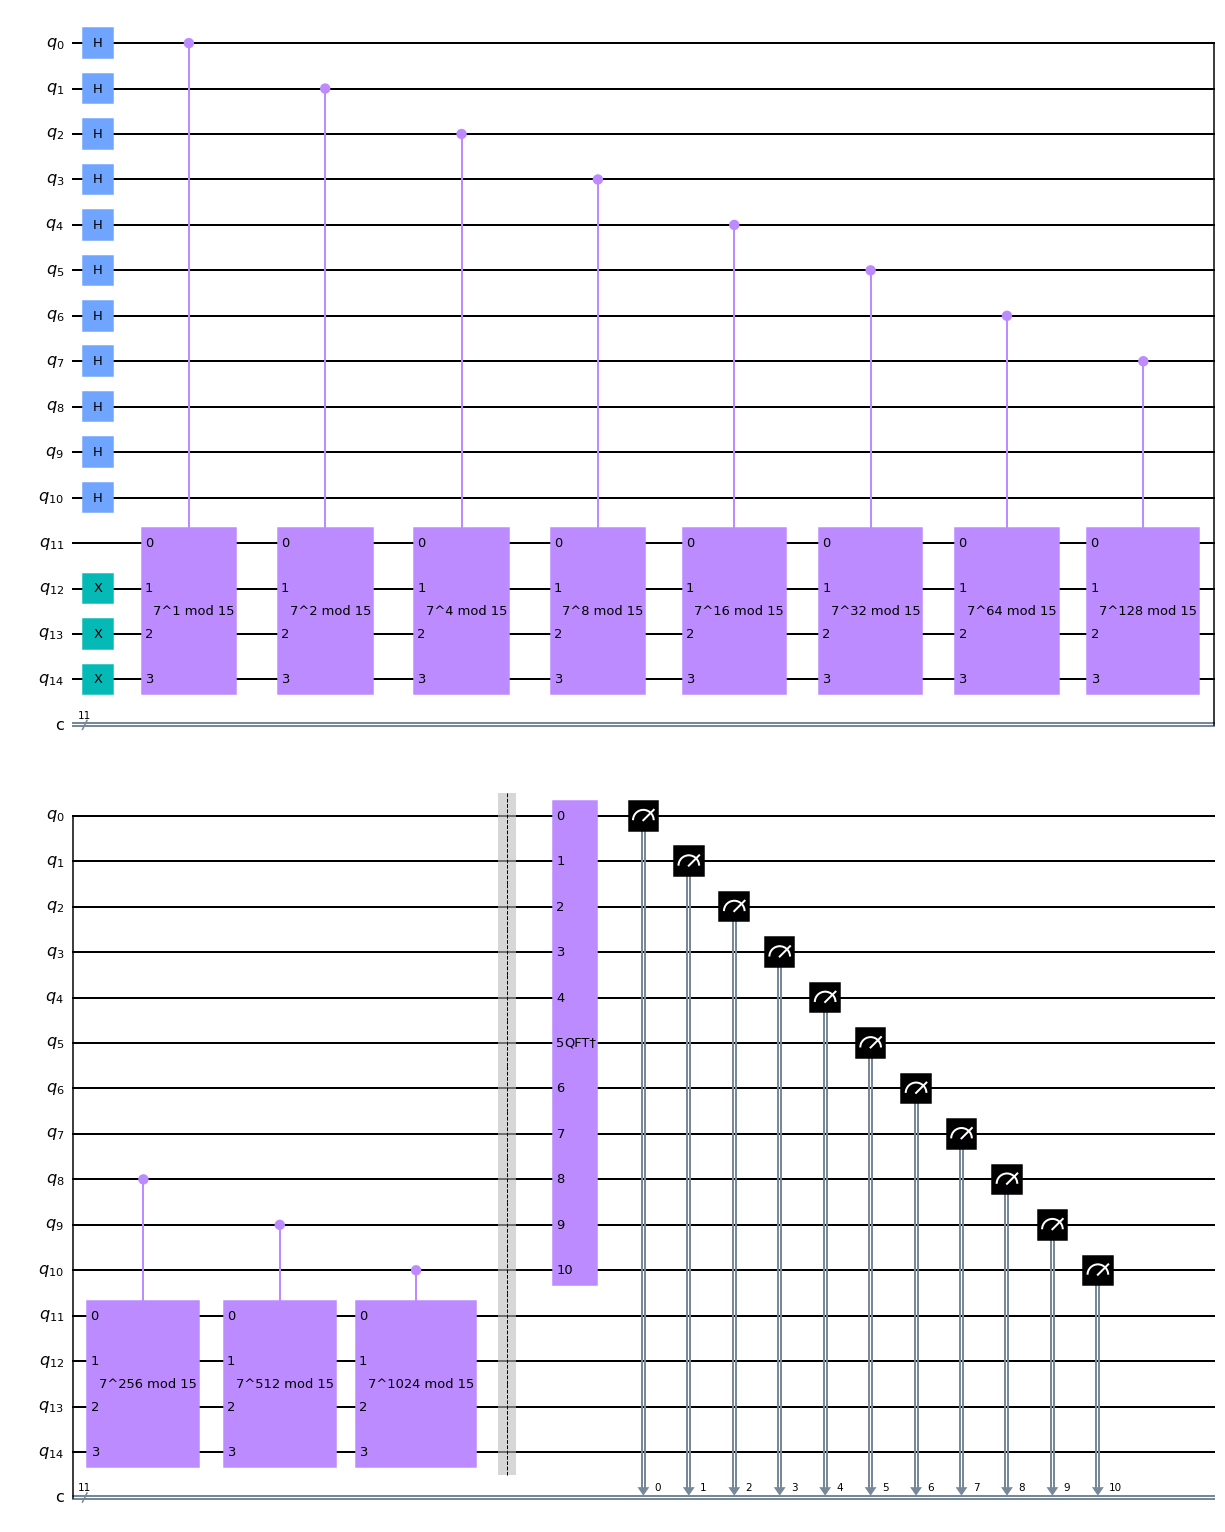

In [15]:
# Choose a=7 for example
L=11
R=4
a=7

# Create a QuantumCircuit with L counting qubits plus R qubits for U to act on
###############################################
### WRITE YOUR CODE BETWEEN THESE LINES - START

qc = QuantumCircuit(L + R, L)

### WRITE YOUR CODE BETWEEN THESE LINES - END
###############################################


# Initialize the left counting qubits to state |+>:
for q in range(L):
    qc.h(q)
    
# Initialize the auxiliary register to whatever nonzero state
qc.x(L+R-1)
qc.x(L+2)
qc.x(L+1)

for q in range(L):
    qc.append(c_amod15(a, 2**q), [q] + [i+L for i in range(R)])

qc.barrier()

# Apply inverse-QFT
qc.append(qft_inv(L),range(L))

# Measurement
qc.measure(range(L), range(L))
qc.draw('mpl')  

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
```python
qc = QuantumCircuit(L + R, L)
```
    
</div>

Let's perform the measurement

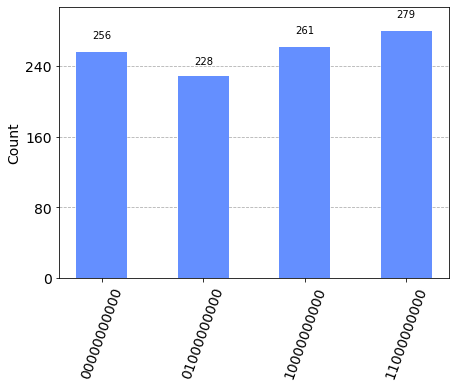

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts)

Since we have $L$ qubits, these results correspond to measured phases $\theta=y/2^L=k/r$

In [17]:
rows, measured_phases = [], []
for output in counts:
    # Convert (base 2) string to decimal
    decimal = int(output, 2) 
    # Find corresponding eigenvalue
    phase = decimal/(2**L)  
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**L} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

                Register Output             Phase
0   01000000000(bin) = 512(dec)   512/2048 = 0.25
1   00000000000(bin) =   0(dec)     0/2048 = 0.00
2  10000000000(bin) = 1024(dec)  1024/2048 = 0.50
3  11000000000(bin) = 1536(dec)  1536/2048 = 0.75


With $a=7$, $L=11$, there are obviously $4$ outputs with increment $I=512$. We can conclude that the period $r=2^L/I=4$.

<div class="alert alert-block alert-success">
    
**Open question**    
    
Above we show a specific implementation of Shor's algorithm for factoring $N=15$ which is not very large. How do we implement a scalable Shor's algorithm with large number $N$. More specifically, how do we implement the oracle $U|z\rangle=U|az(mod N)\rangle$ for arbitrarily large $N$?
   
</div>

<div class="alert alert-block alert-warning">

<font color="#E31D1A">**Answer**</font>
    
There are way to implememt the module oracle with adder and multiplier circuits. There are also ways to shrink the depth of the circuits with periodicity of the oracle. See he following references:
    
- S. Beauregard, **Quantum Information and Computation**, Vol. 3, No. 2 (2003) pp. 175-185, [arXiv: quant-ph/0205095v3](https://arxiv.org/abs/quant-ph/0205095v3)

- T. Monz, et al. **Science**, Vol 351 Issue 6277 (2016) pp. 1068-1070, [arXiv:1507.08852](https://arxiv.org/abs/1507.08852)
    
- A. Kitaev [arXiv:quant-ph/9511026](https://arxiv.org/abs/quant-ph/9511026)
</div>